# 01 INTEGRATION

Author: Murthadza bin Aznam<br>
Date: 2nd August 2021<br>

This Notebook is written as part of the International Virtual Conference on Astrostatistics and Machine Learning (IVCASML2021) course.

---

## 0.0 GOAL
1. To evaluate the integration of a function using two methods:
   1. Using the `scipy.interate` package
   2. Using the Monte Carlo integration method

---

## 1.0 PREPARATION
### 1.1 Defining the function

Given a function $f(x) = 0.5 + \sin(\pi x)$ with the interval of $x$ ∈ \[0.25 ,1.25\] . Write a python program using user define statement to call the function and plot your function using matplotlib. Label your x and y-axis as 'x' and 'y'.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sp

%matplotlib inline

In [2]:
# The function
def sinus(variable):
    return 0.5 + np.sin(np.pi*variable)

# Setting the interval

start = 0.25
end = 1.25

x = np.linspace(start, end)
y = sinus(x)

Text(0.5, 1.0, 'f(x) = 0.5 + $\\sin(\\pi x)$')

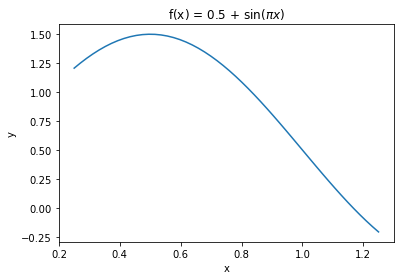

In [3]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'f(x) = 0.5 + $\sin(\pi x)$')

## 2.0 INTEGRATION
### 2.1 Using SCIPY.INTEGRATE

Using the same function, we are going to perform a numerical integral and we
can write our integral as
$$\int_{x_i}^{x_f} 0.5 + \sin(\pi x) dx$$

In [4]:
integration_sp = sp.quad(sinus,start,end)

print("Integration from %s to %s is %f with uncertainty %s"%(start, end, integration_sp[0], integration_sp[1]))

Integration from 0.25 to 1.25 is 0.950158 with uncertainty 1.0750992741073264e-14


### 2.2 Using Monte-Carlo Integration

Next, we use Monte-Carlo integration to obtain estimate for our function. Monte-Carlo integration uses randomly generated $x$ values within range to generate rectangles of random height that is defined by the function. The desired integration is the average area of all the random rectangles. The larger the sample, the more accurate it becomes.

In [5]:
# Give an array of random x's between low limit to high limit
x_mc = np.random.default_rng().uniform(low=start, high=end, size=100000)

# Gives an array of the value of each random element applied to the function (The height of the rectangle)
y_mc = sinus(x_mc)

# An array of the area of rectangle produced by a single x_mc element
area_mc = y_mc*(end-start)

# The integration of the function is the average of all possible rectangles
integration_mc = np.sum(area_mc)/len(area_mc)

print("The result from Monte-Carlo integration is", integration_mc)

The result from Monte-Carlo integration is 0.9490104123983756


## 3.0 COMPARISON

In [6]:
print("Scipy Integration\t: ", integration_sp[0])
print("Monte-Carlo Integration\t: ", integration_mc)

Scipy Integration	:  0.950158158078553
Monte-Carlo Integration	:  0.9490104123983756
